# Completed EDA (Exploratory Data Analysis)

In [2]:
from warnings import filterwarnings 
filterwarnings('ignore')

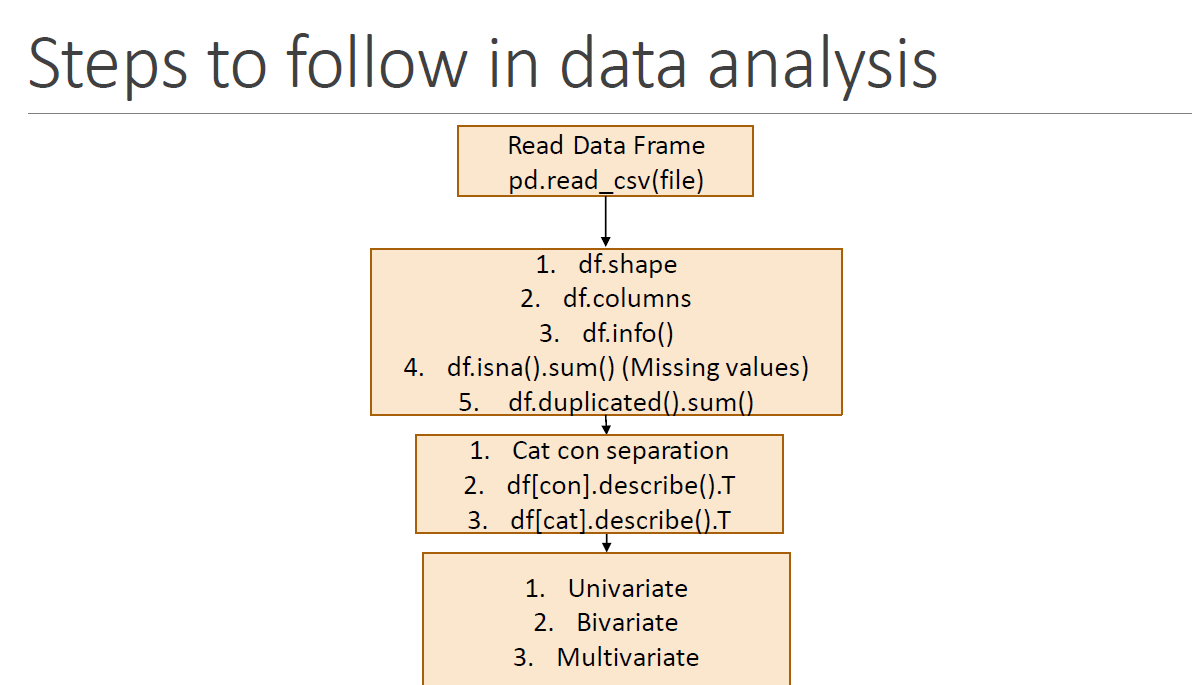

### Step 1 : Read the iris dataset

In [3]:
import os 
os.chdir('E:/Datasets/')

In [4]:
import pandas as pd
df = pd.read_csv('iris.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


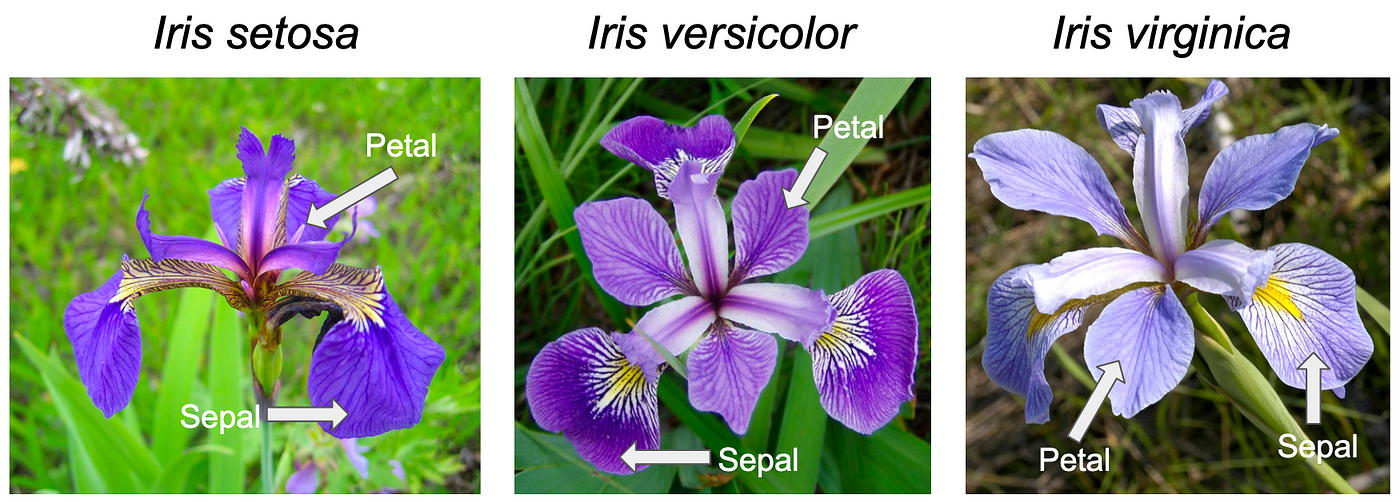

In [5]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

### Step 2: Check basic details for the dataframe

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [8]:
df.duplicated().sum()

1

In [9]:
df[df.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,species
142,5.8,2.7,5.1,1.9,virginica


In [11]:
df.query("sepal_length==5.8 and sepal_width==2.7 and species=='virginica'")

,sepal_length,sepal_width,petal_length,petal_width,species
101,5.8,2.7,5.1,1.9,virginica
142,5.8,2.7,5.1,1.9,virginica


### Step 3 : Descriptive Analytics

In [12]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [13]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [14]:
cat = list(df.columns[df.dtypes=='object'])
con = list(df.columns[df.dtypes!='object'])

In [15]:
cat

['species']

In [16]:
con

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [18]:
df[con].describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


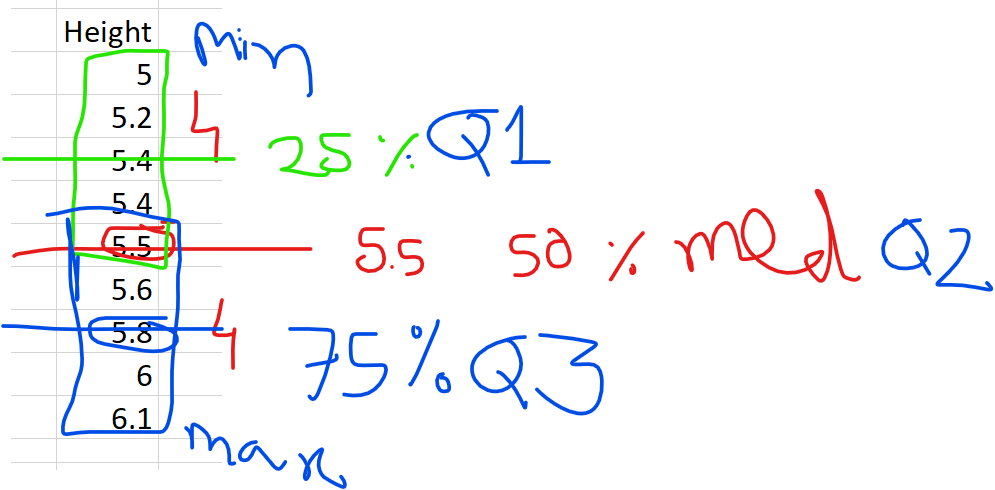

In [19]:
df[cat].describe().T

,count,unique,top,freq
species,150,3,setosa,50


### Step 4 : Univariate Analysis

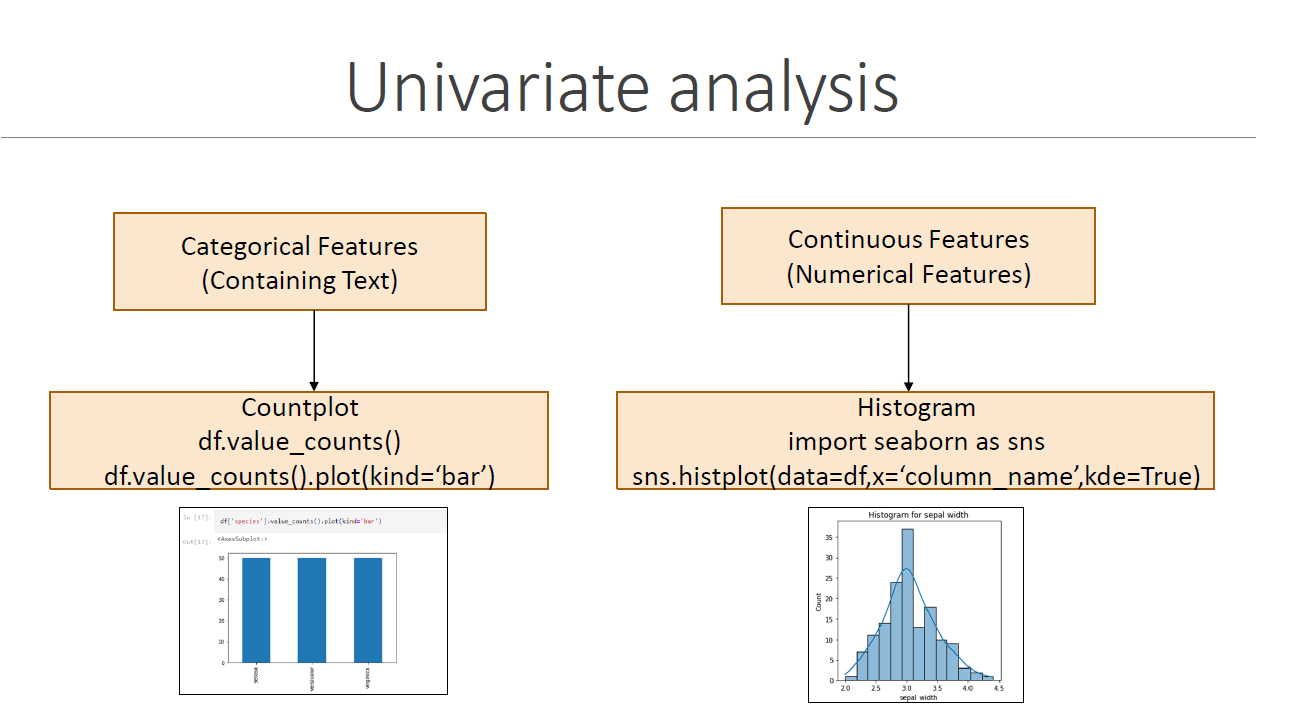

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

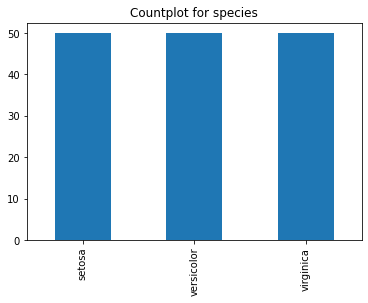

In [22]:
for i in cat:
    df[i].value_counts().plot(kind='bar', title=f'Countplot for {i}')

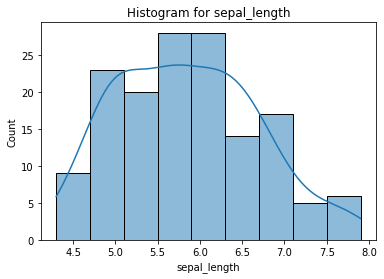

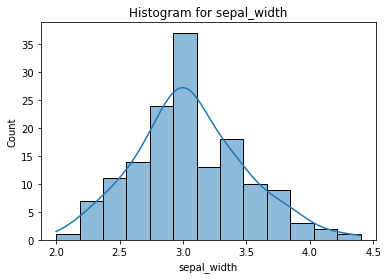

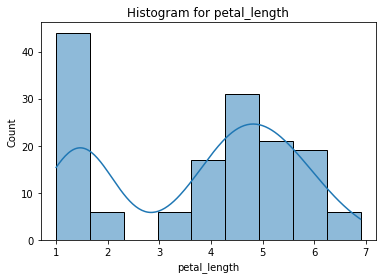

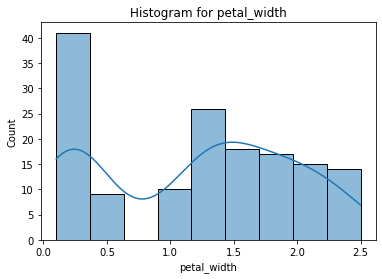

In [24]:
for i in con:
    sns.histplot(data=df, x=i, kde=True)
    plt.title(f'Histogram for {i}')
    plt.show()

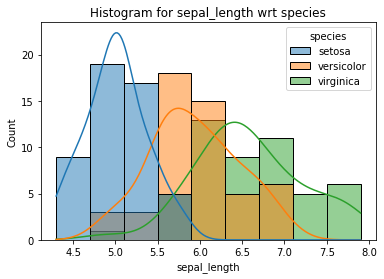

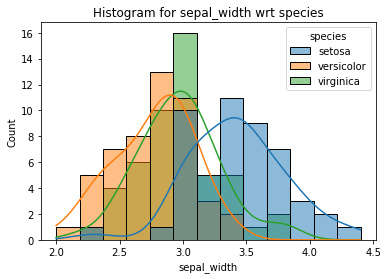

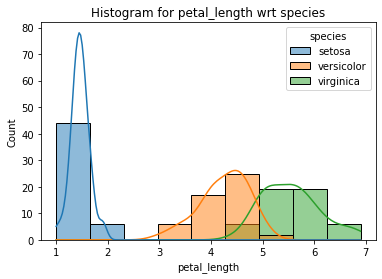

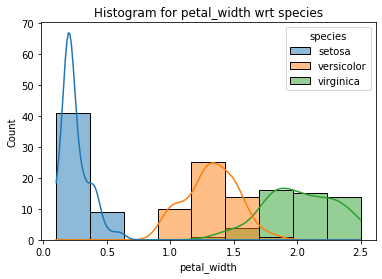

In [25]:
for i in con:
    sns.histplot(data=df, x=i, kde=True, hue='species')
    plt.title(f'Histogram for {i} wrt species')
    plt.show()

### Step 5: Bivariate Analysis
Analysis of 2 variables togethor

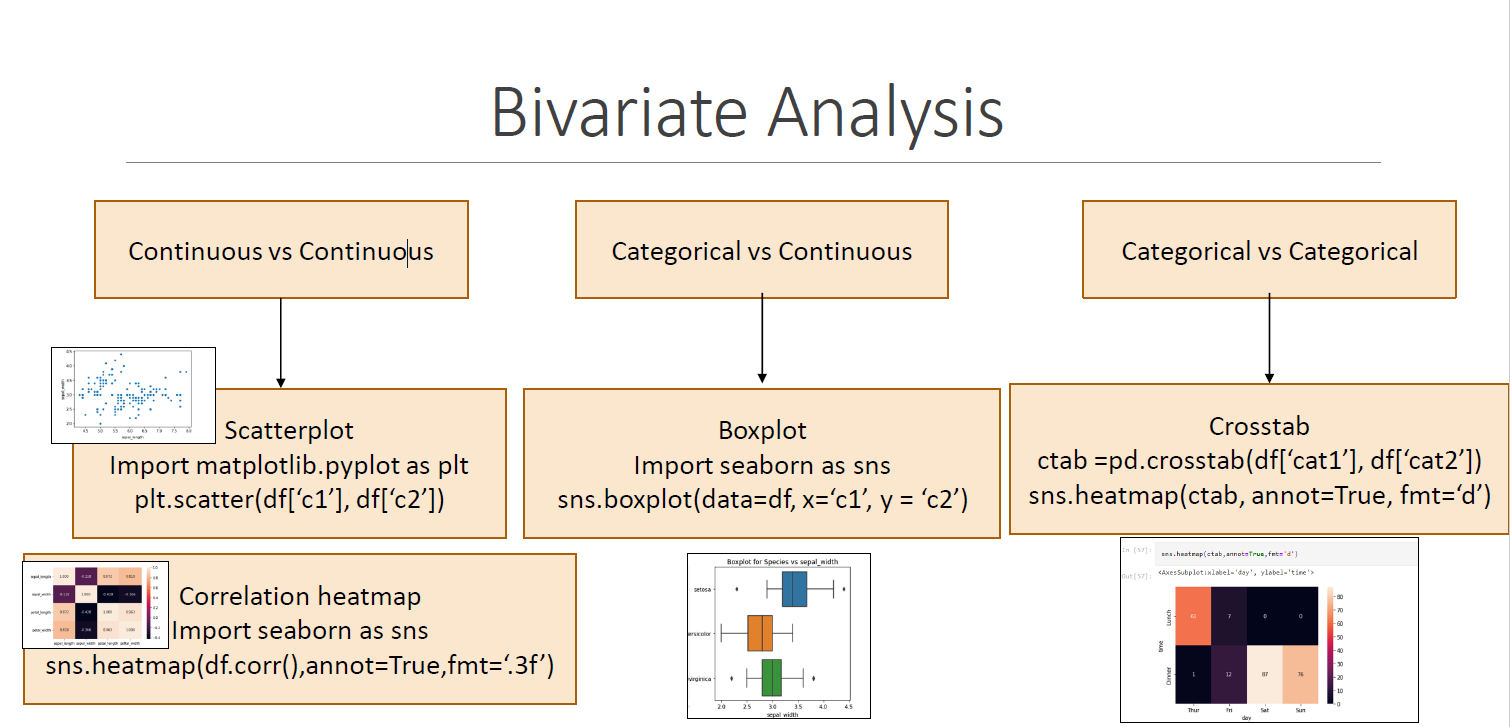

### Continuous vs Continuous
1. Scatterplot
2. Correlation Heatmap

In [26]:
con

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

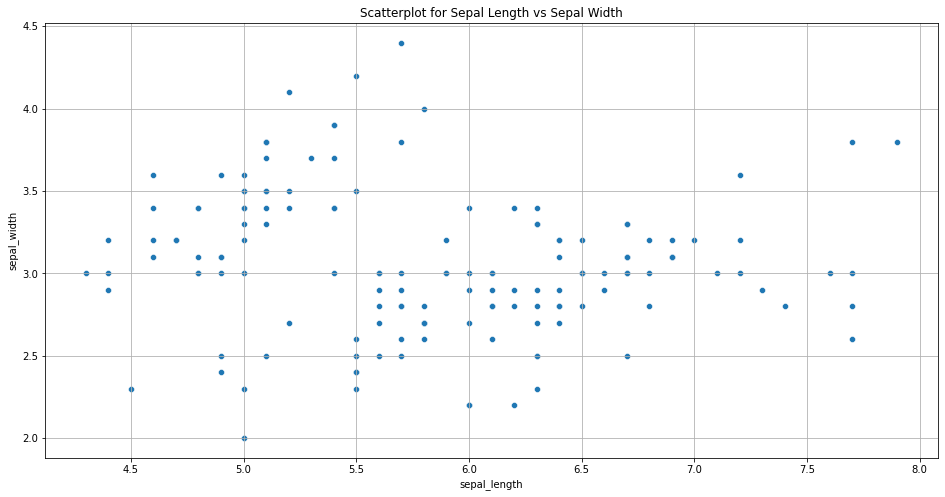

In [33]:
plt.figure(figsize=(16,8))
sns.scatterplot(data=df, x='sepal_length', y='sepal_width')
plt.title('Scatterplot for Sepal Length vs Sepal Width')
plt.grid()
plt.show()

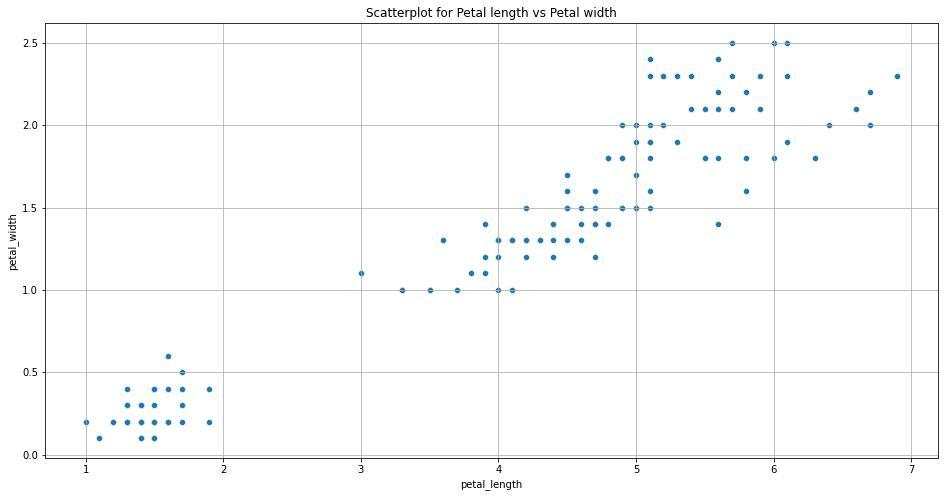

In [32]:
plt.figure(figsize=(16,8))
sns.scatterplot(data=df, x='petal_length', y='petal_width')
plt.title('Scatterplot for Petal length vs Petal width')
plt.grid()
plt.show()

### Petal length and petal width have strong linear relationship

In [34]:
df[con].corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


<AxesSubplot:>

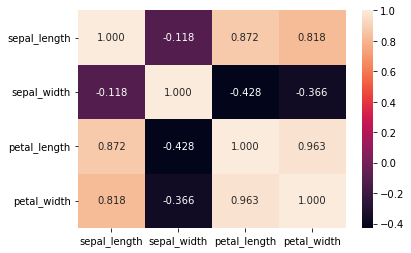

In [40]:
sns.heatmap(data=df[con].corr(), annot=True, fmt='.3f')

### Categorical vs Continuous 
Box Plot

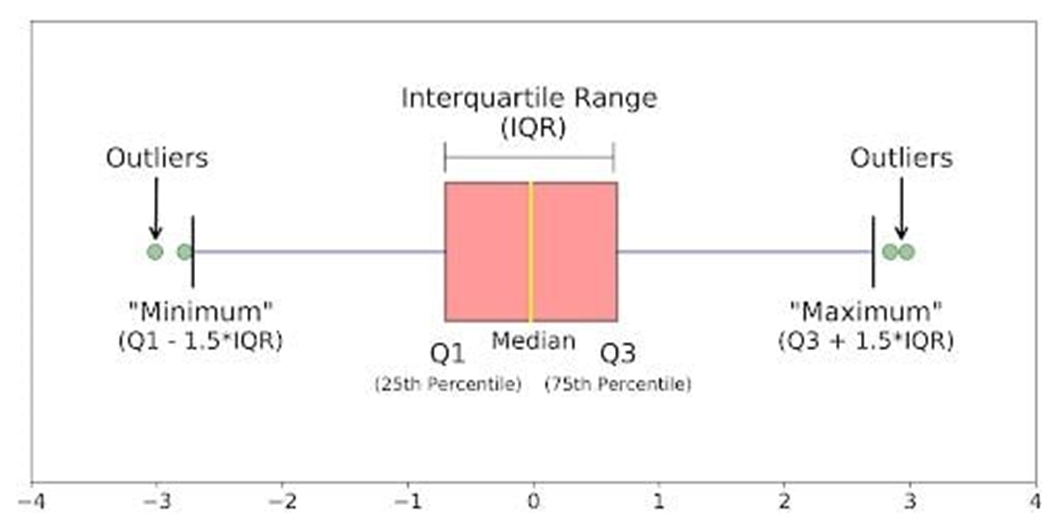

In [41]:
con

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [42]:
cat

['species']

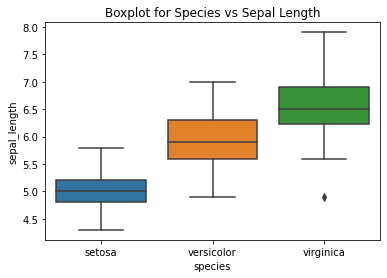

In [43]:
sns.boxplot(data=df, x='species', y='sepal_length')
plt.title('Boxplot for Species vs Sepal Length')
plt.show()

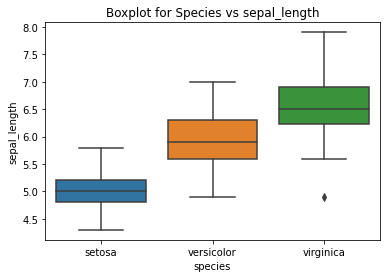

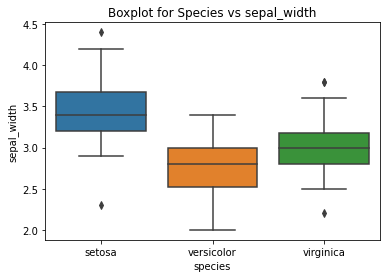

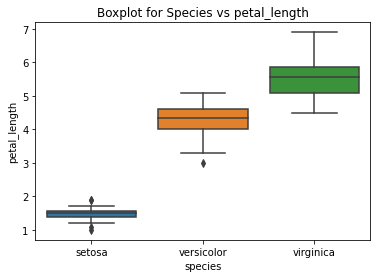

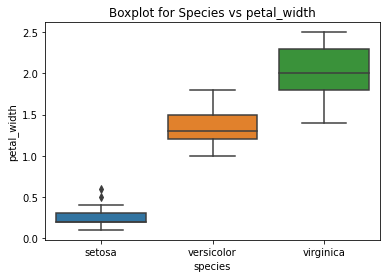

In [44]:
for i in con:
    sns.boxplot(data=df, x='species', y=i)
    plt.title(f'Boxplot for Species vs {i}')
    plt.show()

### Step 6. Multivariate Analysis

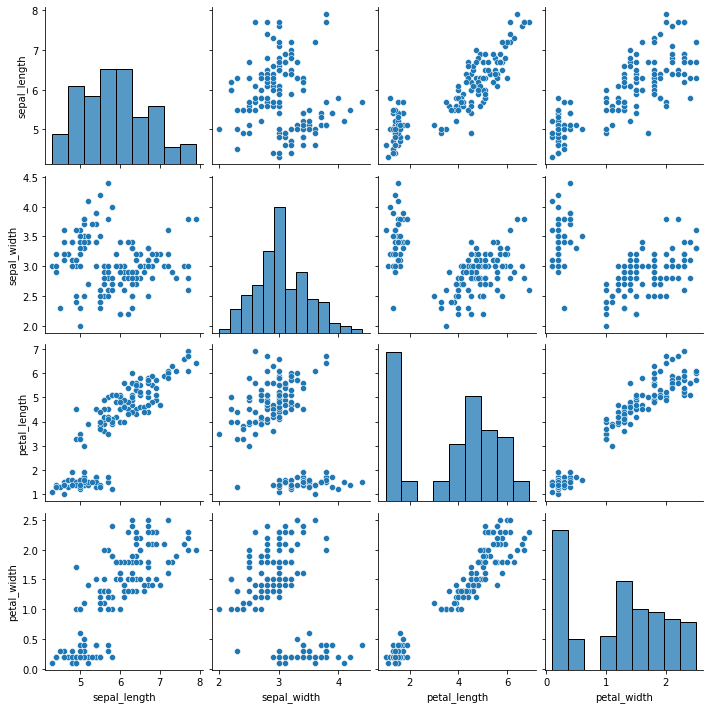

In [45]:
sns.pairplot(data=df)
plt.show()

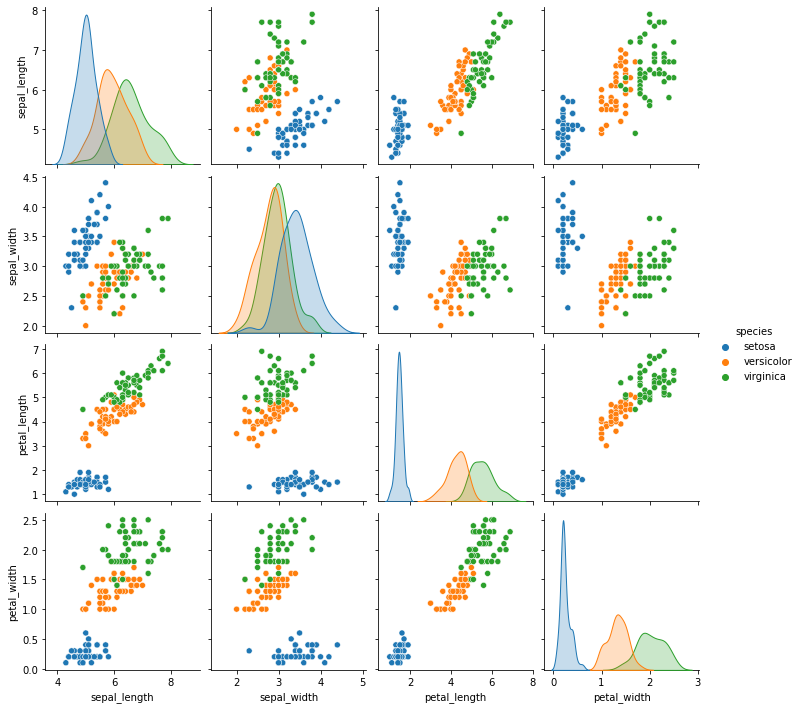

In [47]:
sns.pairplot(data=df, hue='species')
plt.show()